# Exploratory Data Analysis

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load both the training and test data, and combine them
with open('cleaned_data/train_data.pickle', 'rb') as f:
    data = pickle.load(f)
df_train = data['df']
unique_items = data['unique_items']
with open('cleaned_data/test_data.pickle', 'rb') as f:
    data = pickle.load(f)
df_test = data['df']
df = pd.concat([df_train, df_test])
df.sort_values(by='datetime', inplace=True)
df.head()

,tid,month,day_of_month,day_of_week,datetime,hour,items
12546,12546,5,3,6,2015-05-03 03:24:22.936,3,[445106]
10942,10942,5,3,6,2015-05-03 03:58:52.433,3,[440917]
4974,4974,5,3,6,2015-05-03 04:52:21.565,4,[441645]
5846,5846,5,3,6,2015-05-03 04:56:55.471,4,[441645]
3062,3062,5,3,6,2015-05-03 05:00:11.937,5,[210087]


# Distribution of the number of items in an order

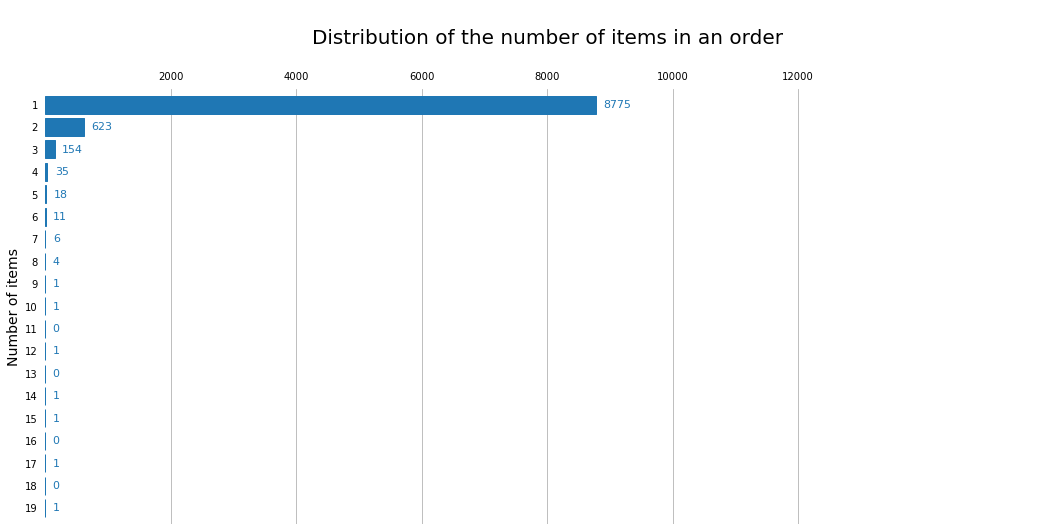

In [3]:
# Calculate the item counts
df['item_count'] = [len(items) for items in df['items']]
item_counts = pd.DataFrame(df['item_count'].value_counts().sort_index())
item_counts.columns=['count']
item_counts['percent'] = item_counts['count'] / len(df) * 100
max_item_count = item_counts.index.max()
item_counts = pd.DataFrame(range(1, max_item_count), index=range(1, max_item_count), columns=['_']) \
                .join(item_counts, how='outer').fillna(0).drop('_', axis=1)
item_counts = item_counts.astype({'count': 'int'})

# Plot
plt.figure(figsize=(18, 8))
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
plt.barh(item_counts.index, item_counts['count'], linewidth=1, edgecolor=color)
plt.ylabel('Number of items', fontsize=14)
plt.title('\nDistribution of the number of items in an order\n', fontsize=20)
plt.xticks(range(2000, 12001, 2000))
plt.xlim([0, 16000])
plt.yticks(list(range(1, max_item_count + 1)))
plt.ylim([0.3, max_item_count + 0.7])
ax = plt.gca()
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(axis='x')
ax.set_axisbelow(True)
ax.xaxis.tick_top()
plt.tick_params(axis='x', bottom=False, top=False)
plt.tick_params(axis='y', left=False, right=False)
for i in item_counts.index:
    count = item_counts.loc[i]['count']
    x = count + 120
    plt.text(x=x, y=i, s=f"{count:.0f}", verticalalignment='center', fontsize=11, color=color)
plt.show()

# Frequency of transactions as functions of time

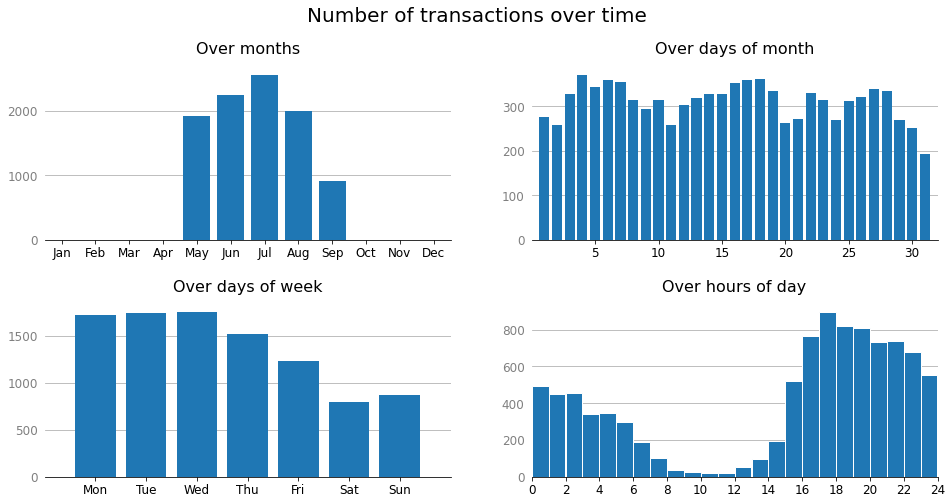

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

# Over months
month_index = range(1, 13)
month_name = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'
}
month_counts = df['month'].value_counts().sort_index()
this_ax = ax[0, 0]
this_ax.bar(month_counts.index, month_counts)
this_ax.set_xlim([0.5, 12.5])
this_ax.set_xticks(month_index)
this_ax.set_xticklabels([month_name[i] for i in month_index], fontsize=12)
for item in this_ax.get_yticklabels():
    item.set_fontsize(12)
this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)
this_ax.spines['left'].set_visible(False)
this_ax.grid(axis='y')
this_ax.set_axisbelow(True)
max_y_value = month_counts.max()
upper_ylim = max_y_value * 1.2
this_ax.set_ylim([0, upper_ylim])
this_ax.set_yticks(np.arange(0, max_y_value * 0.98, 1000))
this_ax.tick_params(axis='y', left=False, right=False, colors=[.5, .5, .5])
this_ax.text(np.mean(this_ax.get_xlim()), this_ax.get_ylim()[1],
             'Over months', fontsize=16, horizontalalignment='center', verticalalignment='top')

# Over days of month
day_of_month_counts = df['day_of_month'].value_counts().sort_index()
this_ax = ax[0, 1]
this_ax.bar(day_of_month_counts.index, day_of_month_counts)
this_ax.set_xlim([0, 32])
this_ax.set_xticks(range(5, 32, 5))
for item in this_ax.get_xticklabels():
    item.set_fontsize(12)
for item in this_ax.get_yticklabels():
    item.set_fontsize(12)
this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)
this_ax.spines['left'].set_visible(False)
max_y_value = day_of_month_counts.max()
upper_ylim = max_y_value * 1.2
this_ax.set_ylim([0, upper_ylim])
this_ax.grid(axis='y')
this_ax.set_axisbelow(True)
this_ax.set_yticks(np.arange(0, max_y_value * 0.98, 100))
this_ax.tick_params(axis='y', left=False, right=False, colors=[.5, .5, .5])
this_ax.text(np.mean(this_ax.get_xlim()), this_ax.get_ylim()[1],
             'Over days of month', fontsize=16, horizontalalignment='center', verticalalignment='top')

# Over days of week
day_of_week_index = range(7)
day_of_week_name = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
day_of_week_counts = df['day_of_week'].value_counts().sort_index()
this_ax = ax[1, 0]
this_ax.bar(day_of_week_counts.index, day_of_week_counts)
this_ax.set_xlim([-1, 7])
this_ax.set_xticks(day_of_week_index)
this_ax.set_xticklabels([day_of_week_name[i] for i in day_of_week_index], fontsize=12)
for item in this_ax.get_yticklabels():
    item.set_fontsize(12)
this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)
this_ax.spines['left'].set_visible(False)
max_y_value = day_of_week_counts.max()
upper_ylim = max_y_value * 1.2
this_ax.set_ylim([0, upper_ylim])
this_ax.grid(axis='y')
this_ax.set_axisbelow(True)
this_ax.set_yticks(np.arange(0, max_y_value * 0.98, 500))
this_ax.tick_params(axis='y', left=False, right=False, colors=[.5, .5, .5])
this_ax.text(np.mean(this_ax.get_xlim()), this_ax.get_ylim()[1],
             'Over days of week', fontsize=16, horizontalalignment='center', verticalalignment='top')

# Over hours
hour_centers = np.arange(0.5, 24, 1)
hour_counts = df['hour'].value_counts().sort_index()
this_ax = ax[1, 1]
this_ax.bar(hour_centers, hour_counts, width=1, edgecolor='w')
this_ax.set_xlim([0, 24])
this_ax.set_xticks(range(0, 25, 2))
for item in this_ax.get_xticklabels():
    item.set_fontsize(12)
for item in this_ax.get_yticklabels():
    item.set_fontsize(12)
this_ax.spines['top'].set_visible(False)
this_ax.spines['right'].set_visible(False)
this_ax.spines['left'].set_visible(False)
max_y_value = hour_counts.max()
upper_ylim = max_y_value * 1.2
this_ax.set_ylim([0, upper_ylim])
this_ax.grid(axis='y')
this_ax.set_axisbelow(True)
this_ax.set_yticks(np.arange(0, max_y_value * 0.98, 200))
this_ax.tick_params(axis='y', left=False, right=False, colors=[.5, .5, .5])
this_ax.text(np.mean(this_ax.get_xlim()), this_ax.get_ylim()[1],
             'Over hours of day', fontsize=16, horizontalalignment='center', verticalalignment='top')

# Add figure title
fig.text(0.5, 0.915, 'Number of transactions over time', fontsize=20, horizontalalignment='center')
plt.show()

# Distribution of purchase probabilities

In [5]:
print(f"{len(unique_items)} unique items")

3000 unique items


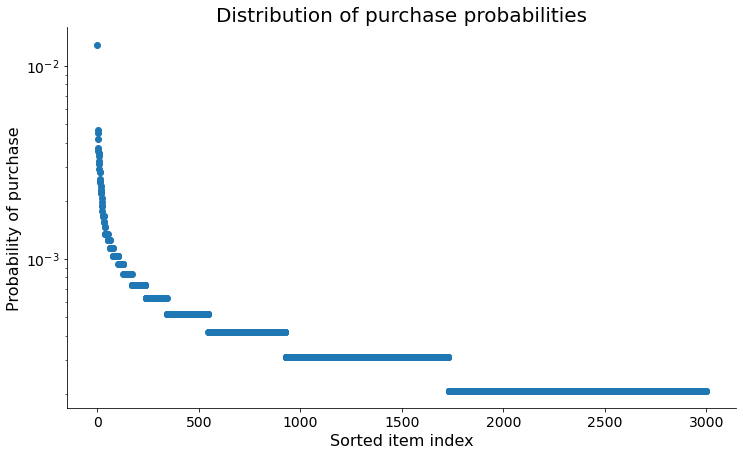

In [6]:
purchases = df['items'].transform(lambda items: np.unique(items)).explode().values
column_name_mapping = {'index': 'item_id', 0: 'frequency'}
purchase_counts = pd.value_counts(purchases) \
                    .reset_index() \
                    .rename(columns=column_name_mapping)
plt.figure(figsize=(12, 7))
plt.semilogy(purchase_counts.index, purchase_counts['frequency'] / len(df), marker='o', linestyle='')
plt.title('Distribution of purchase probabilities', fontsize=20)
plt.xlabel('Sorted item index', fontsize=16)
plt.ylabel('Probability of purchase', fontsize=16)
ax = plt.gca()
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()